In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import randint
from shutil import copyfile
from os.path import splitext
import os
from tqdm import tqdm

In [184]:
data_path = '/home/gorb-roman/robots/images-with-ball-annotated/'
neg_top_path = '/home/gorb-roman/robots/neg_top/'
neg_bottom_path = '/home/gorb-roman/robots/neg_bottom/'

In [185]:
annotations = pd.read_csv(f'{data_path}/annotations.txt', sep=' ',
                          names=['ImageName', 
                                 'UpperRightCorner_X', 
                                 'UpperRightCorner_Y',
                                 'BottomLeftCorner_X', 
                                 'BottomLeftCorner_Y', 
                                 'Class'])

In [186]:
annotations.head()

ImageName  UpperRightCorner_X  UpperRightCorner_Y  BottomLeftCorner_X  \
0   img_101.png                 527                 196                 602   
1   img_106.png                 529                 182                 605   
2   img_107.png                 449                 157                 530   
3  img_1098.png                 146                 159                 201   
4   img_110.png                 415                 172                 498   

   BottomLeftCorner_Y Class  
0                 264  ball  
1                 259  ball  
2                 226  ball  
3                 212  ball  
4                 244  ball

In [187]:
annotations['ImageName'] = [data_path + n for n in annotations['ImageName']]

In [188]:
annotations.head()

ImageName  UpperRightCorner_X  \
0  /home/gorb-roman/robots/images-with-ball-annot...                 527   
1  /home/gorb-roman/robots/images-with-ball-annot...                 529   
2  /home/gorb-roman/robots/images-with-ball-annot...                 449   
3  /home/gorb-roman/robots/images-with-ball-annot...                 146   
4  /home/gorb-roman/robots/images-with-ball-annot...                 415   

   UpperRightCorner_Y  BottomLeftCorner_X  BottomLeftCorner_Y Class  
0                 196                 602                 264  ball  
1                 182                 605                 259  ball  
2                 157                 530                 226  ball  
3                 159                 201                 212  ball  
4                 172                 498                 244  ball

In [189]:
def add_neg(path_to_neg_folder: str, annotations: pd.DataFrame):
    img_filenames = [n for n in os.listdir(path_to_neg_folder) if not 'anno' in n]
    for n in tqdm(img_filenames):
        annotations = annotations.append({'ImageName': path_to_neg_folder + n, 'UpperRightCorner_X': None, 'UpperRightCorner_Y': None, 'BottomLeftCorner_X': None, 'BottomLeftCorner_Y': None, 'Class': 'noball'}, ignore_index=True)
    return annotations

In [190]:
annotations = add_neg(neg_top_path, annotations)

100%|██████████| 1452/1452 [00:03<00:00, 476.08it/s]


In [191]:
annotations = add_neg(neg_bottom_path, annotations)

100%|██████████| 689/689 [00:01<00:00, 467.36it/s]


In [192]:
annotations[annotations['Class'] != 'ball'].sample(20)

ImageName UpperRightCorner_X  \
1788    /home/gorb-roman/robots/neg_bottom/img_2511.png               None   
2265     /home/gorb-roman/robots/neg_bottom/img_336.png               None   
1055       /home/gorb-roman/robots/neg_top/img_2363.png               None   
668         /home/gorb-roman/robots/neg_top/img_089.png               None   
1501  /home/gorb-roman/robots/neg_top/up_log_240675.png               None   
579   /home/gorb-roman/robots/neg_top/whilwheaton_20...               None   
2219  /home/gorb-roman/robots/neg_bottom/log_335295.png               None   
1714    /home/gorb-roman/robots/neg_bottom/img_3303.png               None   
2006  /home/gorb-roman/robots/neg_bottom/log_106826.png               None   
1450  /home/gorb-roman/robots/neg_top/up_log_161685.png               None   
1508        /home/gorb-roman/robots/neg_top/img_472.png               None   
1930    /home/gorb-roman/robots/neg_bottom/img_2686.png               None   
1405      /home/gorb-roman/robots/neg_top/log_52103.png               None   
1825   /home/gorb-roman/robots/neg_bottom/log_59793.png               None   
1107   /home/gorb-roman/robots/neg_top/up_log_76007.png               None   
2116  /home/gorb-roman/robots/neg_bottom/log_275339.png               None   
234        /home/gorb-roman/robots/neg_top/img_2481.png               None   
1278   /home/gorb-roman/robots/neg_top/up_log_55532.png               None   
1407  /home/gorb-roman/robots/neg_top/up_log_154533.png               None   
2023   /home/gorb-roman/robots/neg_bottom/log_61561.png               None   

     UpperRightCorner_Y BottomLeftCorner_X BottomLeftCorner_Y   Class  
1788               None               None               None  noball  
2265               None               None               None  noball  
1055               None               None               None  noball  
668                None               None               None  noball  
1501               None               None               None  noball  
579                None               None               None  noball  
2219               None               None               None  noball  
1714               None               None               None  noball  
2006               None               None               None  noball  
1450               None               None               None  noball  
1508               None               None               None  noball  
1930               None               None               None  noball  
1405               None               None               None  noball  
1825               None               None               None  noball  
1107               None               None               None  noball  
2116               None               None               None  noball  
234                None               None               None  noball  
1278               None               None               None  noball  
1407               None               None               None  noball  
2023               None               None               None  noball

(240, 320, 3)
[None, None, None, None]


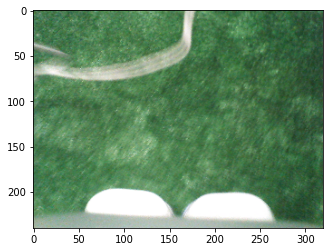

(200, 360)
[None, None, None, None]


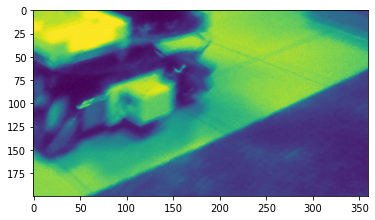

In [193]:
count_images_to_show = 2

indexes = [randint(0, annotations.shape[0]-1) for p in range(0, count_images_to_show)] 

for idx in indexes:
    try:
        img = mpimg.imread(annotations.iloc[idx, 0])
    except BaseException:
        print('next time')
    print(img.shape)
    imgplot = plt.imshow(img)
    
    x1, y1, x2, y2 = [annotations.iloc[idx, coord] for coord in range(1,5)]
    plt.plot([x1,x1, x2,x2, x1], [y1, y2, y2, y1,y1], color='r')
    print([x1, y1, x2, y2])
    plt.show()

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
train, val = train_test_split(annotations, test_size=0.1, random_state=113, stratify=annotations['Class'])

In [196]:
def prepare_folders(path: str):
    os.makedirs(path + 'images/train', exist_ok=True)
    os.makedirs(path + 'images/val', exist_ok=True)
    os.makedirs(path + 'labels/train', exist_ok=True)
    os.makedirs(path + 'labels/val', exist_ok=True)

In [203]:
def parse_ds(ds: pd.DataFrame, src_root: str, dest_img_folder: str, dest_labels_folder: str):
    for i in tqdm(range(len(ds))):
        # parse data sample
        img_path = ds.iloc[i]['ImageName']
        img_filename = os.path.basename(img_path)
        img = mpimg.imread(img_path)
        full_path_src_img = img_path
        full_path_dest_img = dest_img_folder + img_filename
        copyfile(full_path_src_img, full_path_dest_img)
        
        x2,y2,x1,y1 = ds.iloc[i][1:5]
        if x2 is not None:
            label = 0
            cx = (x1 + x2) / 2 / img.shape[1]
            cy = (y1 + y2) / 2 / img.shape[0]
            w = abs(x2 - x1) / img.shape[1]
            h = abs(y2 - y1) / img.shape[0]
            row = f'0 {cx} {cy} {w} {h}'
        else:
            row = ''
    
        file_base = splitext(img_filename)[0]
        
        with open(dest_labels_folder + file_base + '.txt', 'w') as f:
            f.write(row)

In [204]:
prepare_folders('/home/gorb-roman/robots/spqr-dataset/')

In [205]:
parse_ds(train, data_path, '/home/gorb-roman/robots/spqr-dataset/images/train/', '/home/gorb-roman/robots/spqr-dataset/labels/train/')
parse_ds(val, data_path, '/home/gorb-roman/robots/spqr-dataset/images/val/', '/home/gorb-roman/robots/spqr-dataset/labels/val/')

100%|██████████| 235/235 [00:01<00:00, 166.26it/s]
